In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
# Load the new dataset
new_file_path = 'data.csv'
data = pd.read_csv(new_file_path)

# Display the first few rows of the new dataset for examination
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


(None,
                        name  year  selling_price  km_driven    fuel  \
 0             Maruti 800 AC  2007          60000      70000  Petrol   
 1  Maruti Wagon R LXI Minor  2007         135000      50000  Petrol   
 2      Hyundai Verna 1.6 SX  2012         600000     100000  Diesel   
 3    Datsun RediGO T Option  2017         250000      46000  Petrol   
 4     Honda Amaze VX i-DTEC  2014         450000     141000  Diesel   
 
   seller_type transmission         owner  
 0  Individual       Manual   First Owner  
 1  Individual       Manual   First Owner  
 2  Individual       Manual   First Owner  
 3  Individual       Manual   First Owner  
 4  Individual       Manual  Second Owner  )

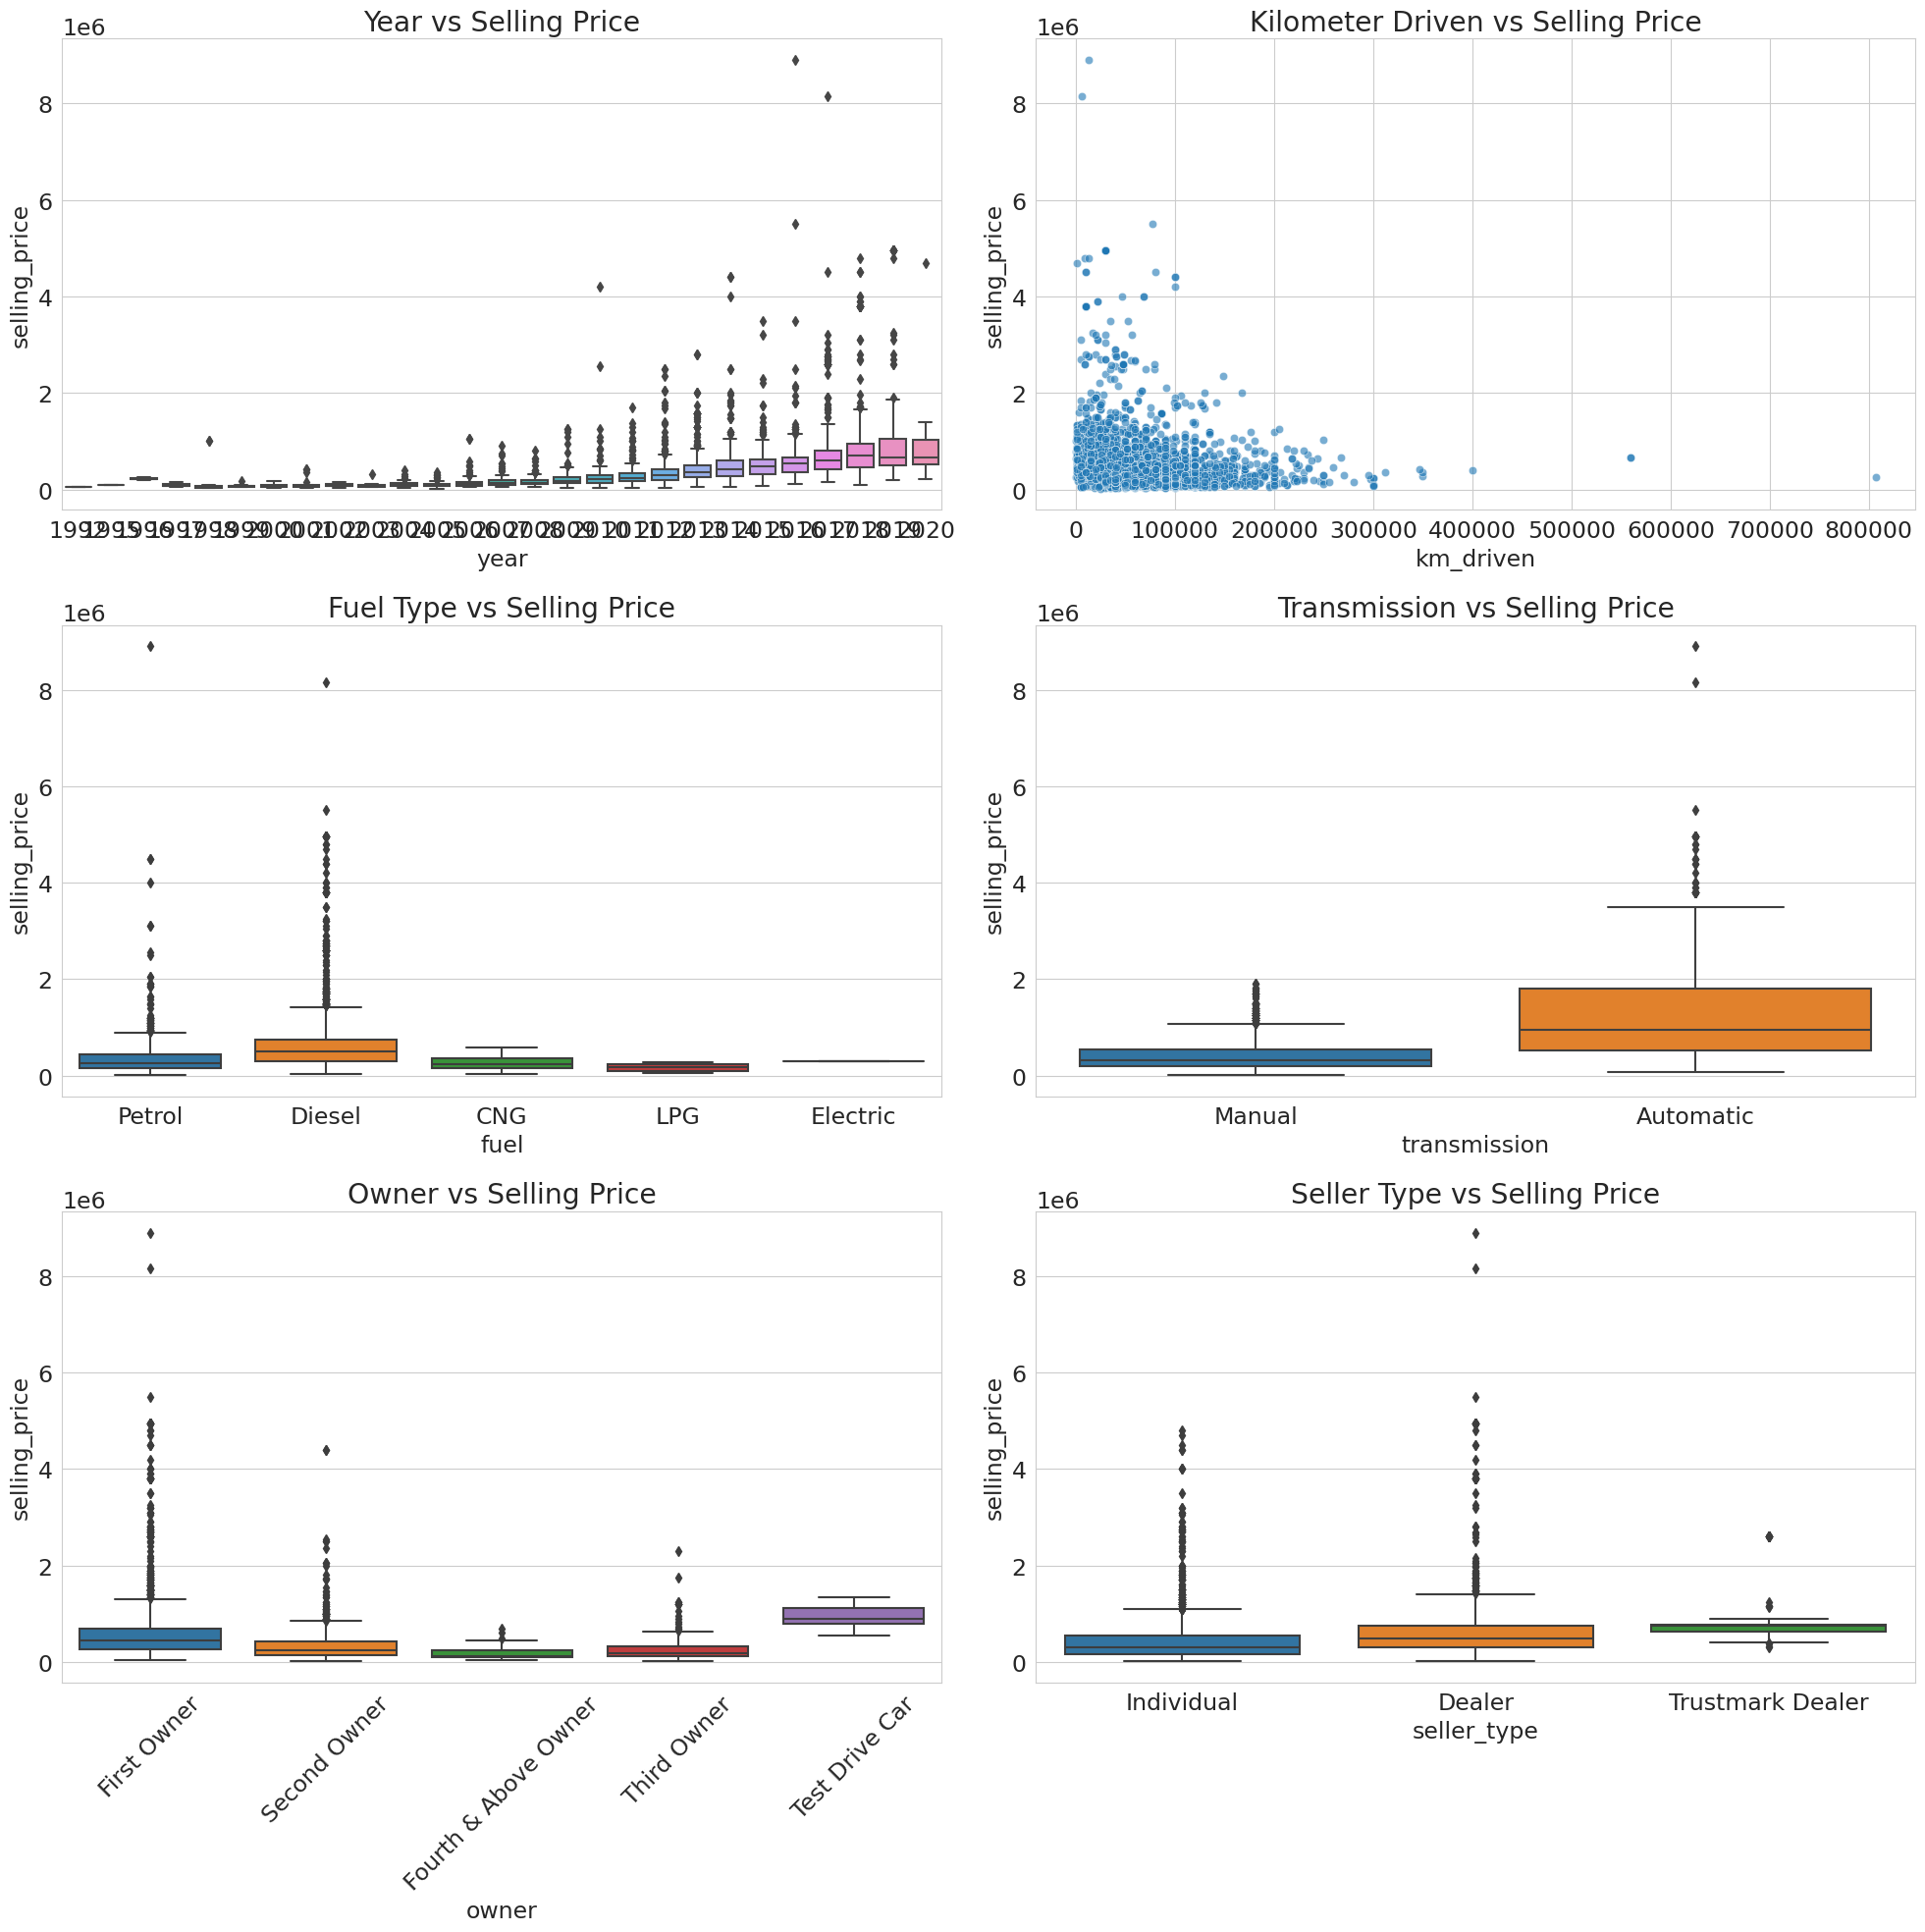

In [70]:
# Updating the plots with larger font size
plt.rcParams.update({'font.size': 17})  # Update default font size

# Re-plotting the graphs including seller_type in a single grid with larger font size
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))

# Plotting Age vs Price
sns.boxplot(data=data, x='year', y='selling_price', ax=axes[0, 0])
axes[0, 0].set_title('Year vs Selling Price')

# Plotting Kilometer vs Price
sns.scatterplot(data=data, x='km_driven', y='selling_price', alpha=0.6, ax=axes[0, 1])
axes[0, 1].set_title('Kilometer Driven vs Selling Price')

# Plotting Fuel Type vs Price
sns.boxplot(data=data, x='fuel', y='selling_price', ax=axes[1, 0])
axes[1, 0].set_title('Fuel Type vs Selling Price')

# Plotting Transmission vs Price
sns.boxplot(data=data, x='transmission', y='selling_price', ax=axes[1, 1])
axes[1, 1].set_title('Transmission vs Selling Price')

# Plotting Owner vs Price
sns.boxplot(data=data, x='owner', y='selling_price', ax=axes[2, 0])
axes[2, 0].set_title('Owner vs Selling Price')
axes[2, 0].tick_params(axis='x', rotation=45)

# Plotting Seller Type vs Price
sns.boxplot(data=data, x='seller_type', y='selling_price', ax=axes[2, 1])
axes[2, 1].set_title('Seller Type vs Selling Price')

plt.tight_layout()
plt.show()

In [71]:
# Manual: 0, Automatic: 1
data['transmission'] = data['transmission'].apply(lambda x: 0 if x == 'Manual' else 1)

# One-hot encode "fuel" and "seller_type"
data = pd.get_dummies(data, columns=['fuel', 'seller_type'])

# Convert year to age
data['age'] = 2020 - data['year']

# Drop the original 'year' column
data = data.drop(columns='year')

# Step 5: Ordinal encode "owner"
owner_mapping = {
    'Test Drive Car': 0, 
    'First Owner': 1, 
    'Second Owner': 2, 
    'Third Owner': 3, 
    'Fourth & Above Owner': 4
}
data['owner'] = data['owner'].map(owner_mapping)

# Display the updated data
data.head()

,name,selling_price,km_driven,transmission,owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,age
0,Maruti 800 AC,60000,70000,0,1,False,False,False,False,True,False,True,False,13
1,Maruti Wagon R LXI Minor,135000,50000,0,1,False,False,False,False,True,False,True,False,13
2,Hyundai Verna 1.6 SX,600000,100000,0,1,False,True,False,False,False,False,True,False,8
3,Datsun RediGO T Option,250000,46000,0,1,False,False,False,False,True,False,True,False,3
4,Honda Amaze VX i-DTEC,450000,141000,0,2,False,True,False,False,False,False,True,False,6


In [72]:
# Step 2: Extract the brand of the car
data['brand'] = data['name'].apply(lambda x: x.split(' ')[0])

# Check the unique brands extracted
unique_brands = data['brand'].unique()

# Display the unique brands and updated data
unique_brands, data.head()

(array(['Maruti', 'Hyundai', 'Datsun', 'Honda', 'Tata', 'Chevrolet',
        'Toyota', 'Jaguar', 'Mercedes-Benz', 'Audi', 'Skoda', 'Jeep',
        'BMW', 'Mahindra', 'Ford', 'Nissan', 'Renault', 'Fiat',
        'Volkswagen', 'Volvo', 'Mitsubishi', 'Land', 'Daewoo', 'MG',
        'Force', 'Isuzu', 'OpelCorsa', 'Ambassador', 'Kia'], dtype=object),
                        name  selling_price  km_driven  transmission  owner  \
 0             Maruti 800 AC          60000      70000             0      1   
 1  Maruti Wagon R LXI Minor         135000      50000             0      1   
 2      Hyundai Verna 1.6 SX         600000     100000             0      1   
 3    Datsun RediGO T Option         250000      46000             0      1   
 4     Honda Amaze VX i-DTEC         450000     141000             0      2   
 
    fuel_CNG  fuel_Diesel  fuel_Electric  fuel_LPG  fuel_Petrol  \
 0     False        False          False     False         True   
 1     False        False          False  

In [73]:
# Categorizing brands
brand_categories = {
    'Mercedes-Benz': 'High-End German',
    'Audi': 'High-End German',
    'BMW': 'High-End German',
    'Volkswagen': 'Mainstream German',
    'Skoda': 'Mainstream German',
    'Toyota': 'Japanese',
    'Nissan': 'Japanese',
    'Honda': 'Japanese',
    'Mitsubishi': 'Japanese',
    'Isuzu': 'Japanese',
    'Maruti': 'Indian',
    'Tata': 'Indian',
    'Mahindra': 'Indian',
    'Chevrolet': 'American',
    'Ford': 'American',
    'Jeep': 'American',
    'Hyundai': 'Korean',
    'Kia': 'Korean',
    'Renault': 'European',
    'Fiat': 'European',
    'Volvo': 'European',
}

# Brands not categorized will be placed in 'Other'
data['brand_category'] = data['brand'].map(brand_categories).fillna('Other')

# Counting the number of cars per brand category
brand_category_counts = data['brand_category'].value_counts()

# Displaying the counts
brand_category_counts

brand_category
Indian               2006
Korean                822
Japanese              529
American              429
European              187
Mainstream German     175
High-End German       134
Other                  58
Name: count, dtype: int64

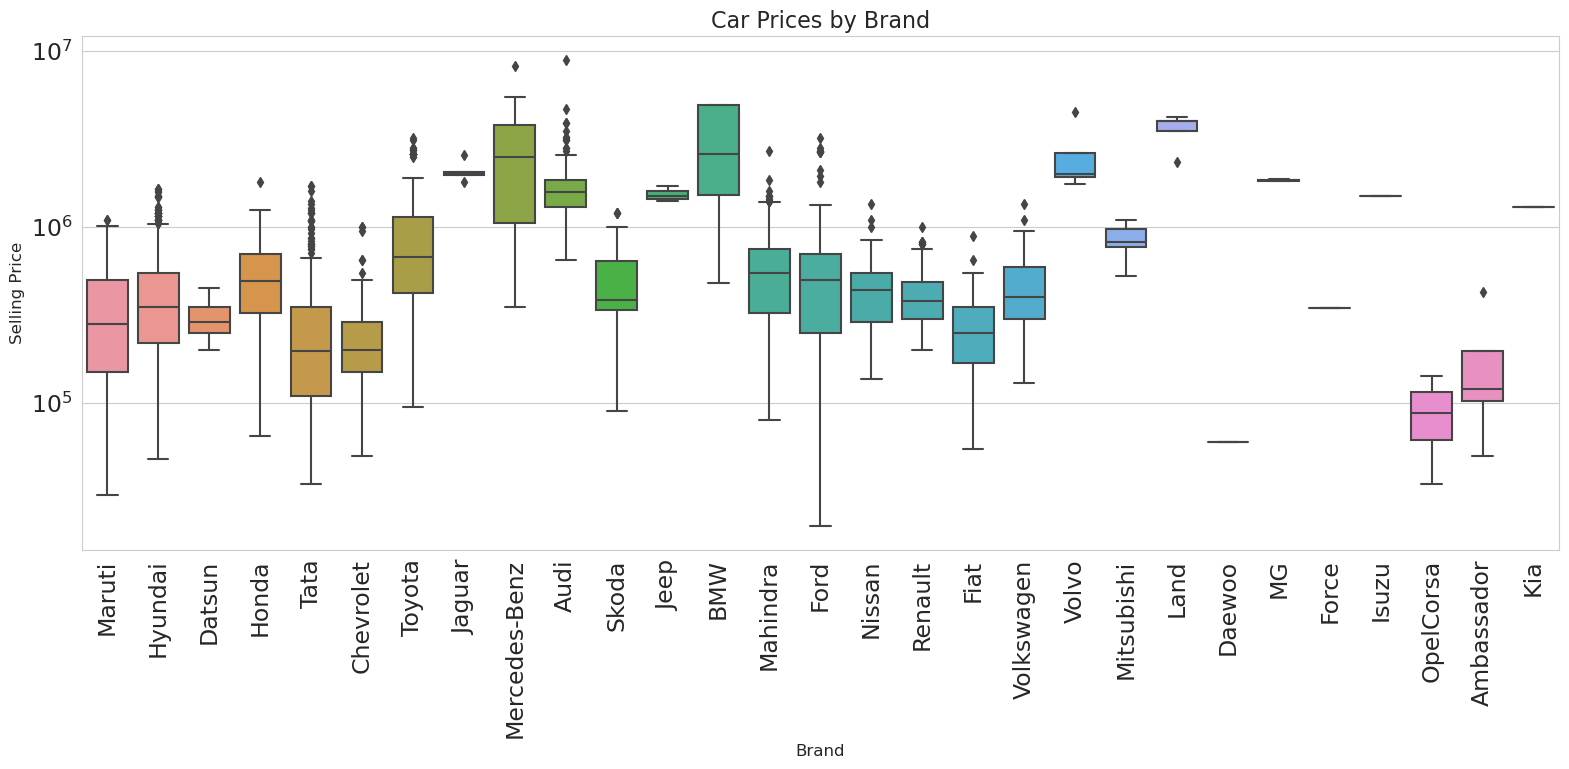

In [74]:
# Initialize the matplotlib figure
plt.figure(figsize=(16, 8))

# Create a boxplot
sns.boxplot(x='brand', y='selling_price', data=data)

# Title and labels
plt.title('Car Prices by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.xticks(rotation=90)
plt.yscale('log')  # Using a logarithmic scale due to wide range in prices

# Display the plot
plt.tight_layout()
plt.show()

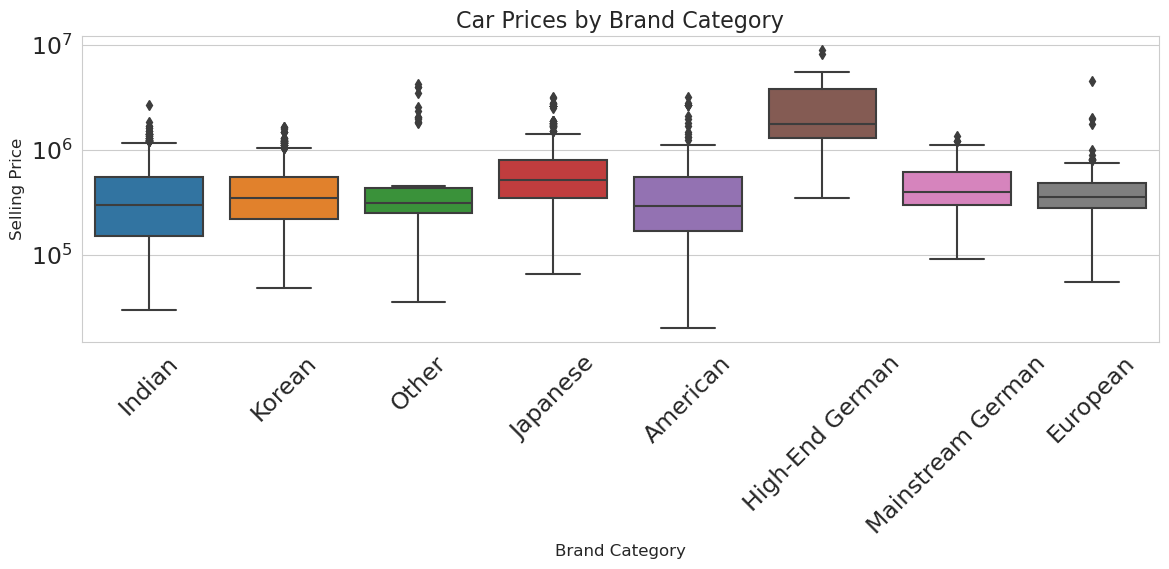

In [75]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a boxplot
sns.boxplot(x='brand_category', y='selling_price', data=data)

# Title and labels
plt.title('Car Prices by Brand Category', fontsize=16)
plt.xlabel('Brand Category', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.xticks(rotation=45)
plt.yscale('log')  # Using a logarithmic scale due to wide range in prices

# Display the plot
plt.tight_layout()
plt.show()

In [76]:
# One-hot encode 'brand_category'
data_final = pd.get_dummies(data, columns=['brand_category'])

# Dropping 'name' and 'brand' as they won't be used in the model
data_final = data_final.drop(columns=['name', 'brand'])

# Displaying the final data structure before model training
data_final.head()

,selling_price,km_driven,transmission,owner,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,...,seller_type_Trustmark Dealer,age,brand_category_American,brand_category_European,brand_category_High-End German,brand_category_Indian,brand_category_Japanese,brand_category_Korean,brand_category_Mainstream German,brand_category_Other
0,60000,70000,0,1,False,False,False,False,True,False,...,False,13,False,False,False,True,False,False,False,False
1,135000,50000,0,1,False,False,False,False,True,False,...,False,13,False,False,False,True,False,False,False,False
2,600000,100000,0,1,False,True,False,False,False,False,...,False,8,False,False,False,False,False,True,False,False
3,250000,46000,0,1,False,False,False,False,True,False,...,False,3,False,False,False,False,False,False,False,True
4,450000,141000,0,2,False,True,False,False,False,False,...,False,6,False,False,False,False,True,False,False,False


In [77]:
from sklearn.model_selection import train_test_split

# Define features (X) and the target (y) variable
X = data_final.drop(columns='selling_price')
y = data_final['selling_price']

# Split the data into training and testing sets (70/15/15)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define the hyperparameters grid to search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 8, 10, 12],
    'min_samples_split': [10, 20, 30],
    'min_samples_leaf': [5, 10, 15]
}

# Initialize the model
rf_model_tuning = RandomForestRegressor(random_state=42, n_jobs=1)  # No parallel processing

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_model_tuning,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',  # MAE as scoring
    cv=5,  # 5-fold cross-validation
    n_jobs=-1,  # No parallel processing
    verbose=1  # Output progress
)

# Perform GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from the GridSearch
best_params = grid_search.best_params_
best_params

Fitting 5 folds for each of 108 candidates, totalling 540 fits


{'max_depth': 12,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 150}

In [79]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=50,  # Default value
    min_samples_split=10,
    min_samples_leaf=5,
    max_depth=12,
    random_state=42,
    n_jobs=-1  # Use all available CPUs
)

# Fit the model
rf_model.fit(X_train, y_train)

# Predictions
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_val)

# Evaluation: Calculate and print the metrics for both training and testing sets
metrics = {
    "Mean Absolute Error": (mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_val, y_test_pred)),
    "Mean Squared Error": (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_val, y_test_pred)),
    "R^2 Score": (r2_score(y_train, y_train_pred), r2_score(y_val, y_test_pred))
}

metrics_df = pd.DataFrame(metrics, index=['Train', 'Test'])
metrics_df

,Mean Absolute Error,Mean Squared Error,R^2 Score
Train,117036.533494,4.656715e+10,0.867418
Test,144415.410465,9.296392e+10,0.731056


In [80]:
# Drop some columns to reduce dimensionality
X_train_reduced = X_train.drop(columns=['owner', 'fuel_LPG', 'fuel_Electric', 'fuel_CNG'])
X_test_reduced = X_val.drop(columns=['owner', 'fuel_LPG', 'fuel_Electric', 'fuel_CNG'])

In [81]:
# Initialize the model
rf_model = RandomForestRegressor(
    n_estimators=50,  # Default value
    min_samples_split=10,
    min_samples_leaf=5,
    max_depth=12,
    random_state=42,
    n_jobs=-1  # Use all available CPUs
)

# Fit the model
rf_model.fit(X_train_reduced, y_train)

# Predictions
y_train_pred_rf = rf_model.predict(X_train_reduced)
y_test_pred_rf = rf_model.predict(X_test_reduced)

# Evaluation: Calculate and print the metrics for both training and testing sets
metrics = {
    "Mean Absolute Error": (mean_absolute_error(y_train, y_train_pred_rf), mean_absolute_error(y_val, y_test_pred_rf)),
    "Mean Squared Error": (mean_squared_error(y_train, y_train_pred_rf), mean_squared_error(y_val, y_test_pred_rf)),
    "R^2 Score": (r2_score(y_train, y_train_pred_rf), r2_score(y_val, y_test_pred_rf))
}

metrics_df = pd.DataFrame(metrics, index=['Train', 'Test'])
metrics_df

,Mean Absolute Error,Mean Squared Error,R^2 Score
Train,117930.821147,4.696869e+10,0.866275
Test,144736.296915,9.337428e+10,0.729869


In [82]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Take the logarithm of the prices
y_train_log = np.log(y_train)
y_test_log = np.log(y_val)

# Initialize and fit the Linear Regression model
lr_model = LinearRegression()  # No parallel processing
lr_model.fit(X_train_reduced, y_train_log)

# Predictions
y_train_pred_log = lr_model.predict(X_train_reduced)
y_test_pred_log = lr_model.predict(X_test_reduced)

# Convert predictions back to original scale
y_train_pred_lr = np.exp(y_train_pred_log)
y_test_pred_lr = np.exp(y_test_pred_log)

# Evaluation: Calculate and print the metrics for both training and testing sets
metrics_lr = {
    "Mean Absolute Error": (mean_absolute_error(y_train, y_train_pred_lr), mean_absolute_error(y_val, y_test_pred_lr)),
    "Mean Squared Error": (mean_squared_error(y_train, y_train_pred_lr), mean_squared_error(y_val, y_test_pred_lr)),
    "R^2 Score": (r2_score(y_train, y_train_pred_lr), r2_score(y_val, y_test_pred_lr))
}

metrics_df_lr = pd.DataFrame(metrics_lr, index=['Train', 'Test'])
metrics_df_lr

,Mean Absolute Error,Mean Squared Error,R^2 Score
Train,156414.099086,8.796359e+10,0.749557
Test,166898.253577,1.511248e+11,0.562797


In [87]:
# Finally test RF with test set:
y_test_pred_rf = rf_model.predict(X_test.drop(columns=['owner', 'fuel_LPG', 'fuel_Electric', 'fuel_CNG']))

# Evaluation: Calculate and print the metrics for both training and testing sets
metrics = {
    "Mean Absolute Error": (mean_absolute_error(y_train, y_train_pred_rf), mean_absolute_error(y_test, y_test_pred_rf)),
    "Mean Squared Error": (mean_squared_error(y_train, y_train_pred_rf), mean_squared_error(y_test, y_test_pred_rf)),
    "R^2 Score": (r2_score(y_train, y_train_pred_rf), r2_score(y_test, y_test_pred_rf))
}

metrics_df = pd.DataFrame(metrics, index=['Train', 'Test'])
metrics_df

,Mean Absolute Error,Mean Squared Error,R^2 Score
Train,117930.821147,4.696869e+10,0.866275
Test,146994.036671,7.821961e+10,0.681591


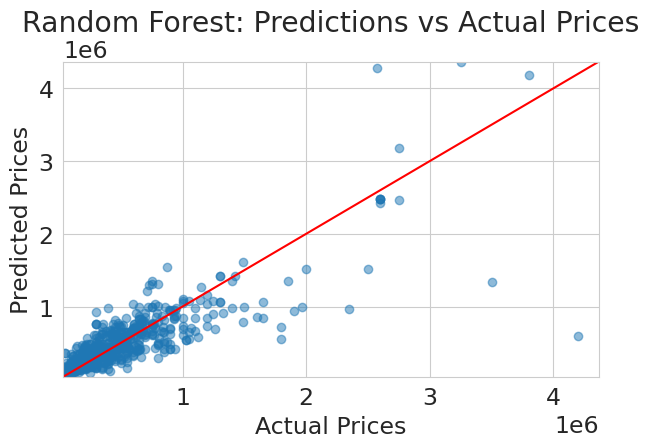

In [88]:
# Determine common axis limits
min_limit = min(y_test.min(), y_test_pred_rf.min(), y_test_pred_lr.min())
max_limit = max(y_test.max(), y_test_pred_rf.max(), y_test_pred_lr.max())

plt.scatter(y_test, y_test_pred_rf, alpha=0.5)
plt.plot([min_limit, max_limit], [min_limit, max_limit], color='red')  # Line of perfect prediction
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Random Forest: Predictions vs Actual Prices")
plt.xlim(min_limit, max_limit)
plt.ylim(min_limit, max_limit)

plt.tight_layout()
plt.show()